In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv("/Users/udit/git projects/ML---Implimentations/Linear Regression/economic_index.csv")

In [73]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [74]:
df.drop(columns=['Unnamed: 0','year','month'], axis = 1, inplace=True)

In [75]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [76]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

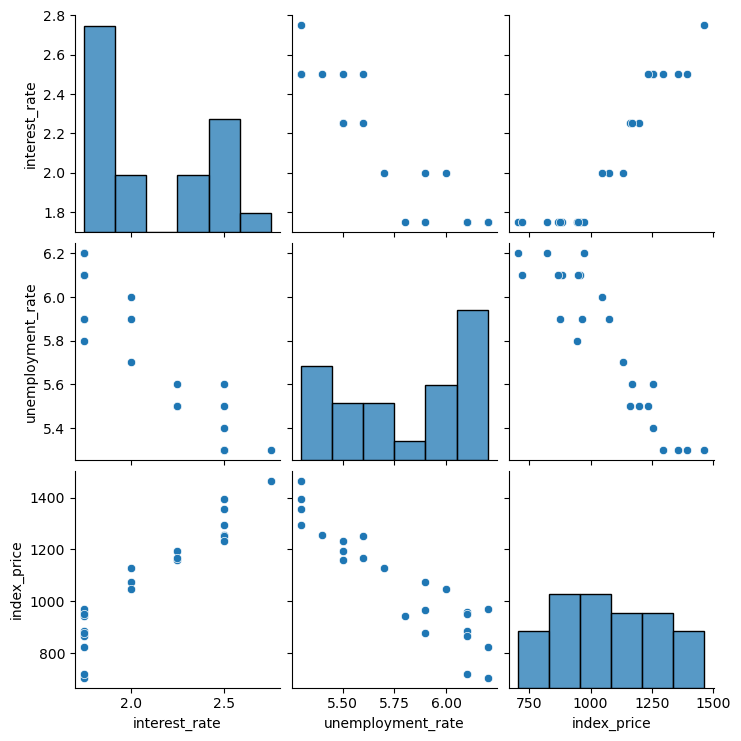

In [77]:
sns.pairplot(df)

<Axes: >

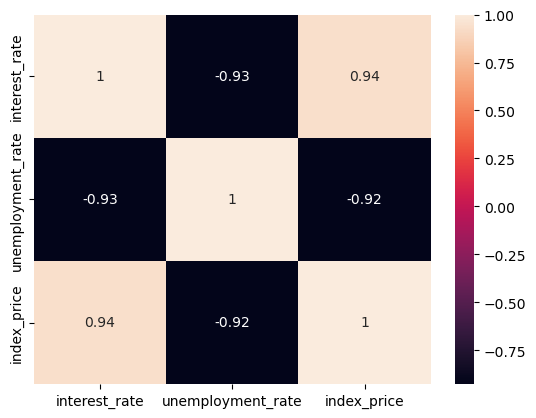

In [78]:
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Unemployment_rate')

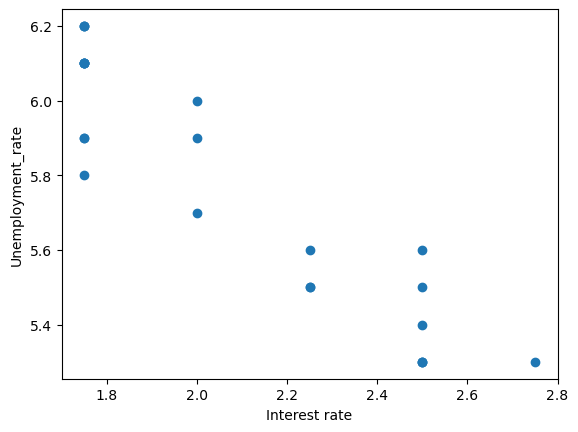

In [79]:
plt.scatter(x = df['interest_rate'], y = df['unemployment_rate'])
plt.xlabel('Interest rate')
plt.ylabel('Unemployment_rate')

In [80]:
X = df.drop('index_price', axis=1)
y = df['index_price']

In [81]:
print(X.shape)
print(y.shape)

(24, 2)
(24,)


In [82]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

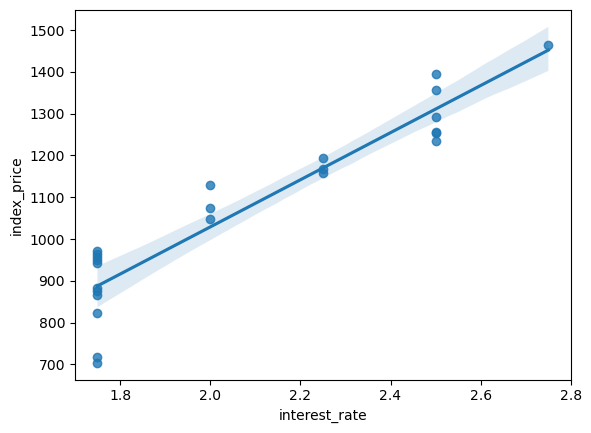

In [83]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

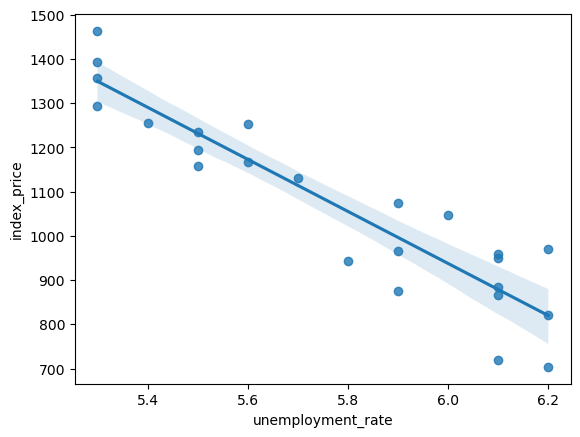

In [84]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [85]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

model.fit(X_train,y_train) 


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Let's learn cross_val_score

In [87]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model, X_train,y_train, scoring = 'neg_mean_squared_error',
                                   cv = 3)

In [88]:
np.mean(validation_score)

np.float64(-5914.828180162395)

In [100]:
print("Coefficent or slope : ", model.coef_)
print("Intercept : ", model.intercept_)

Coefficent or slope :  [  88.27275507 -116.25716066]
Intercept :  1053.4444444444443


In [89]:
# prediction 
y_pred = model.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)

Score : 0.8278978091457142
Addjusted R2 score : 0.713163015242857
mean_absolute_error : 59.935781523235526
mean_squared_error : 5793.762887712579
root_mean_squared_error 76.11677139574812


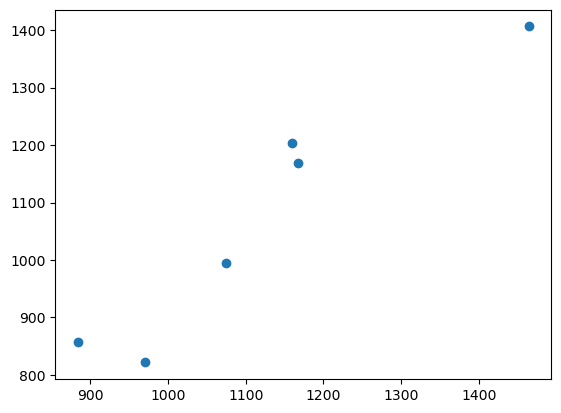

In [91]:
plt.scatter(y_test,y_pred)

In [92]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


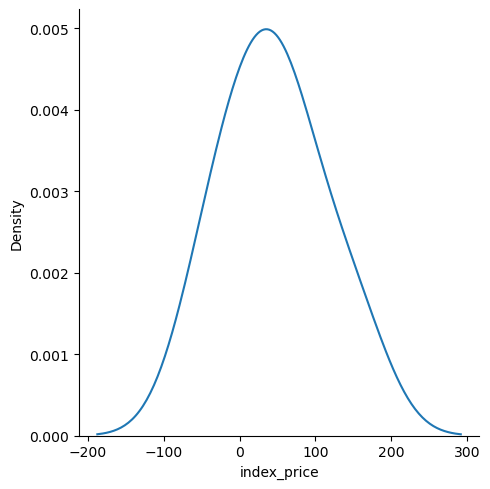

In [93]:
sns.displot(residuals, kind='kde')

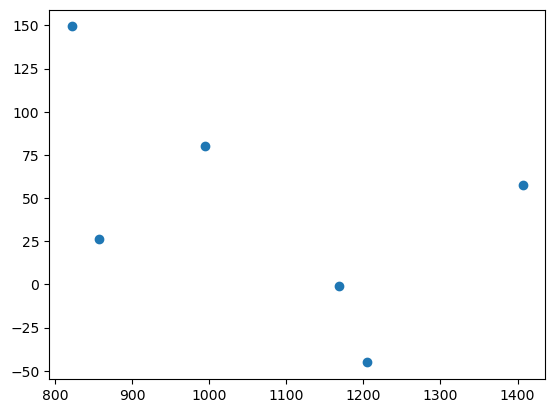

In [95]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [98]:
import statsmodels.api as sm 
Ols_model = sm.OLS(y_train,X_train).fit()
Ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                       0.754
Time:                        23:11:37   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""